In [7]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
ruta_local = 'C:\Documents'

In [9]:
path_shp_recorridos = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\RECORRIDOS.shp'
path_shp_plan = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

In [10]:
# Cargar los archivos Shapefile
gdf_recorridos = gpd.read_file(path_shp_recorridos)
gdf_plan = gpd.read_file(path_shp_plan)

In [60]:
idd = 4

In [61]:
selec_recorridos = gdf_recorridos[gdf_recorridos['idd']==idd]

In [62]:
selec_plan = gdf_plan[gdf_plan['idd'] == idd]

C:\Users\bismarksr\AppData\Local\Temp\ipykernel_33228\2512288014.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


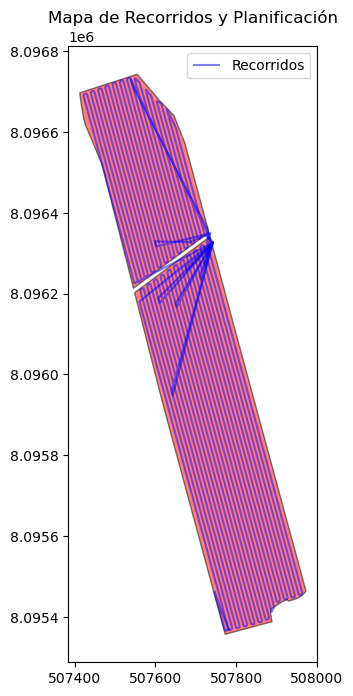

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))
# Graficar las capas
selec_recorridos.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", label="Recorridos")
selec_plan.plot(ax=ax, color="red", alpha=0.5, edgecolor="black", label="Planificación")

# Configurar la visualización
ax.set_title("Mapa de Recorridos y Planificación")
ax.legend()

# Mostrar el gráfico
plt.show()

In [64]:
selec_recorridos["fecha"] = pd.to_datetime(selec_recorridos["fecha"])

C:\Users\bismarksr\anaconda3\envs\utea_reportes\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [65]:
# Obtener la fecha mínima y máxima
fecha_min = selec_recorridos["fecha"].min()
fecha_max = selec_recorridos["fecha"].max()
fecha_intermedia = fecha_min + (fecha_max - fecha_min) / 2

In [66]:
# Convertir las fechas al formato dd/mm/aaaa
fecha_min_str = fecha_min.strftime("%d/%m/%Y")
fecha_max_str = fecha_max.strftime("%d/%m/%Y")
fecha_intermedia_str = fecha_intermedia.strftime("%d/%m/%Y")
# Obtener el número de semana de la fecha intermedia
numero_semana = fecha_intermedia.isocalendar().week

In [67]:
area_total_pulv = selec_recorridos['area'].sum()
area_total_pulv

27.755333472109996

In [68]:
fecha_min

Timestamp('2025-03-11 00:00:00')

In [70]:
fecha_max

Timestamp('2025-03-11 00:00:00')

In [71]:
fecha_intermedia

Timestamp('2025-03-11 00:00:00')

In [72]:
numero_semana

11

In [73]:
num_vuelos = len(selec_recorridos)
num_vuelos

13

In [74]:
selec_recorridos

,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,geometry
123,T50_20250311141847_R4693815100.kml,2025-03-11,14:18:47,R4693815100,T50,1581F6BUB24630011R08,MARIO SANCHEZ,9:40,Auto,4.0,9.5,29.880001,3.257333,32.707,4,"LINESTRING (507741.560 8096327.637, 507741.560..."
124,T50_20250311143323_R4793927835.kml,2025-03-11,14:33:23,R4793927835,T50,1581F6BUB24630011R08,MARIO SANCHEZ,9:49,Auto,4.0,9.5,33.839999,3.697333,37.061,4,"LINESTRING (507741.940 8096325.727, 507741.940..."
125,T50_20250311144654_R4914063117.kml,2025-03-11,14:46:54,R4914063117,T50,1581F6BUB24630011R08,MARIO SANCHEZ,6:41,Auto,4.0,9.5,33.839999,2.170667,21.752,4,"LINESTRING (507734.727 8096348.618, 507734.727..."
126,T50_20250311145615_R4994153305.kml,2025-03-11,14:56:15,R4994153305,T50,1581F6BUB24630011R08,MARIO SANCHEZ,4:58,Auto,4.0,9.5,29.880001,1.762000,17.636,4,"LINESTRING (507735.665 8096348.758, 507735.665..."
127,T50_20250311150335_R5114288587.kml,2025-03-11,15:03:35,R5114288587,T50,1581F6BUB24630011R08,MARIO SANCHEZ,4:57,Auto,4.0,9.5,29.880001,1.728000,17.300,4,"LINESTRING (507740.738 8096326.852, 507722.059..."
128,T50_20250311151036_R5254446416.kml,2025-03-11,15:10:36,R5254446416,T50,1581F6BUB24630011R08,MARIO SANCHEZ,8:38,Auto,4.0,9.5,29.880001,3.290667,32.994,4,"LINESTRING (507741.247 8096326.241, 507741.247..."
129,T50_20250311152201_R5374581698.kml,2025-03-11,15:22:01,R5374581698,T50,1581F6BUB24630011R08,MARIO SANCHEZ,8:53,Auto,4.0,9.5,29.880001,3.522667,35.340,4,"LINESTRING (507741.064 8096325.798, 507741.064..."
130,T50_20250311153349_R5414626792.kml,2025-03-11,15:33:49,R5414626792,T50,1581F6BUB24630011R08,MARIO SANCHEZ,8:54,Auto,4.0,9.5,33.119999,3.374667,33.817,4,"LINESTRING (507742.392 8096325.364, 507742.392..."
131,T50_20250311154718_R5454671886.kml,2025-03-11,15:47:18,R5454671886,T50,1581F6BUB24630011R08,MARIO SANCHEZ,9:00,Auto,4.0,9.5,29.880001,3.051333,30.599,4,"LINESTRING (507742.047 8096325.129, 507742.046..."
132,T50_20250311155920_R5694942450.kml,2025-03-11,15:59:20,R5694942450,T50,1581F6BUB24630011R08,MARIO SANCHEZ,4:37,Auto,4.0,9.5,29.880001,1.091333,10.982,4,"LINESTRING (507742.011 8096327.591, 507742.011..."


In [75]:
# Convert "fl_time" to total seconds
selec_recorridos["fl_time_sec"] = selec_recorridos["fl_time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
# Sum all seconds
total_seconds = selec_recorridos["fl_time_sec"].sum()
# Convert back to hh:mm:ss format
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60
total_flight_time = f"{hours:02}:{minutes:02}:{seconds:02}"
total_flight_time

C:\Users\bismarksr\anaconda3\envs\utea_reportes\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


'01:19:45'

In [76]:
total_caudal = selec_recorridos['spray'].sum()
total_caudal

278.32

In [77]:
df_parte = pd.read_excel(path_xlsx_parte)

In [78]:
df_parte['FECHA'] = pd.to_datetime(df_parte['FECHA'], errors='coerce')
df_parte['HORA DE INICIO'] = pd.to_datetime(df_parte['HORA DE INICIO'], errors='coerce')
df_parte['HORA FINAL'] = pd.to_datetime(df_parte['HORA FINAL'], errors='coerce')

In [79]:
df_parte

,Nº DE LABOR,FECHA,SEMANA,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,...,OS,TEMP MAX,TEMP MIN,TIPO CULTIVO,TIPO DESARROLLO,NUM VUELOS,HORAS VUELO,TOTAL CAUDAL,idd,AREA PULVERIZADO
0,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L31,30.260942,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,28.633271
1,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L16,23.216246,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,21.664272
2,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L6,19.683505,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,19.160233
3,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L35,7.795719,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,7.369442
4,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L34,7.048921,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,6.632540
5,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L5,10.318332,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,9.850859
6,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L9,26.783587,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,21.533076
7,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L15,17.950658,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,16.469801
8,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L7,15.371285,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,14.745376
9,PA-2025-1,2025-07-03,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L10,26.586339,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,20.709980


In [80]:
# extraer primer dato de temp max
temp_max = df_parte[df_parte['idd'] == idd]['TEMP MAX'].iloc[0]
temp_min = df_parte[df_parte['idd'] == idd]['TEMP MIN'].iloc[0]

In [81]:
temp = round((temp_max + temp_min) / 2)
temp

24

In [82]:
# Aplicar el buffer a la geometría
selec_recorridos["geometry"] = selec_recorridos.geometry.buffer(5.5)

C:\Users\bismarksr\anaconda3\envs\utea_reportes\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [83]:
# Disolver todas las geometrías en un solo polígono
buffer_dissolved = selec_recorridos.dissolve()

In [84]:
buffer_dissolved

,geometry,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,fl_time_sec
0,"POLYGON ((507782.940 8095362.194, 507782.409 8...",T50_20250311141847_R4693815100.kml,2025-03-11,14:18:47,R4693815100,T50,1581F6BUB24630011R08,MARIO SANCHEZ,9:40,Auto,4.0,9.5,29.880001,3.257333,32.707,4,580


In [85]:
# Calcular la intersección
interseccion = gpd.overlay(buffer_dissolved, selec_plan, how="intersection")

In [86]:
# Calcular el área de cada polígono de la intersección
interseccion["area_rociado"] = interseccion.geometry.area / 10000

In [87]:
resumen = interseccion[['id_2', 'unidad_05', 'area_2', 'area_rociado']].copy()

In [88]:
# Calcular el total de area_2
total_area_2 = resumen["area_2"].sum()
total_area_rociado = resumen["area_rociado"].sum()
# Crear una nueva columna con el porcentaje
resumen["porcen_rociado"] = (resumen["area_rociado"] / total_area_2)

In [89]:
diferencia = total_area_rociado - area_total_pulv
diferencia

0.42707471066335856

In [90]:
resumen["area_diff"] = resumen["porcen_rociado"] * diferencia

In [91]:
resumen["area_rociado_ajustado"] = resumen["area_rociado"] - resumen["area_diff"]

In [92]:
resumen = resumen[['id_2', 'unidad_05', 'area_2', 'area_rociado_ajustado']].copy()

In [93]:
total_area_rociado_ajustado = resumen["area_rociado_ajustado"].sum()
resumen["porcen_rociado"] = (resumen["area_rociado_ajustado"]) / (resumen["area_2"])

In [94]:
resumen["dif_area"] = resumen["area_2"] - resumen["area_rociado_ajustado"]

In [95]:
resumen

,id_2,unidad_05,area_2,area_rociado_ajustado,porcen_rociado,dif_area
0,16,L2.3,19.763782,18.661257,0.944215,1.102525
1,17,L2.4,9.528110,9.110252,0.956145,0.417857


In [96]:
for i, row in resumen.iterrows():
    df_parte.loc[(df_parte['ID'] == row['id_2']), 'AREA PULVERIZADO'] = row['area_rociado_ajustado']

In [97]:
df_parte.loc[(df_parte['idd'] == idd), 'FECHA'] = fecha_intermedia
df_parte.loc[(df_parte['idd'] == idd), 'SEMANA'] = numero_semana
df_parte.loc[(df_parte['idd'] == idd), 'HORA DE INICIO'] = fecha_min
df_parte.loc[(df_parte['idd'] == idd), 'HORA FINAL'] = fecha_max
df_parte.loc[(df_parte['idd'] == idd), 'TEMPERATURA'] = temp
df_parte.loc[(df_parte['idd'] == idd), 'NUM VUELOS'] = num_vuelos
df_parte.loc[(df_parte['idd'] == idd), 'HORAS VUELO'] = total_flight_time
df_parte.loc[(df_parte['idd'] == idd), 'TOTAL CAUDAL'] = total_caudal

In [98]:
output_path = path_xlsx_parte
df_parte.to_excel(output_path, index=False)